# CNN MNIST 

In [2]:
# 필요한 패키지 가져오기

import tensorflow as tf
import keras
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

In [ ]:
# 데이터 가져오기
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(X_train.shape) ## 이미지수, 높이, 너비

(60000, 28, 28)


In [ ]:
# 데이터 전처리
## CNN에 맞게 4차원 배열 (이미지 수, 높이, 너비, 채널 수)로 변환 
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
print(X_train.shape)

(60000, 28, 28, 1)


In [ ]:
# 데이터 정규화
## 픽셀값을 0에서 1 사이로 정규화
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [ ]:
# 목표 변수 전처리 - one-hot 인코딩
## 레이블을 원핫인코딩하여 범주형으로 변환
### 0~9까지의 숫자로 이루어진 레이블을 원핫인코딩으로 변환 (총 10개)
Y_train = tf.keras.utils.to_categorical(y_train, 10)
Y_test = tf.keras.utils.to_categorical(y_test, 10)

In [ ]:
# 모형 구조 정의하기
model = Sequential()
model.add(Conv2D(32,(3,3),activation='relu', input_shape=(28, 28, 1))) # 합성곱 연산 수행
  ## filters: 32개의 필터를 사용
  ## kernel_size: 3x3 크기의 필터 사용
  ## activation: 활성화 함수로 relu 사용
  ## input_shape: 입력 데이터의 크기로 28*28*1(흑백) 지정
print(model.output_shape)

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
  ## MaxPooling: 2x2 크기의 풀링 사용
model.add(Dropout(0.25))
  ## 과적합을 방지하기 위해 학습 중 일부 뉴런(25%)을 무작위로 비활성화
model.add(Flatten())
  ## 2D 특징 맵을 1D 벡터로 변환하여 완전 연결 층의 입력으로 사용할 수 있게 함
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
  ## softmax 활성화 함수로 각 클래스의 확률을 출력한다.
print(model.summary())

(None, 26, 26, 32)
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               589952    
_________________________________________________________________
dropout_1 (Dropout)          (None, 1

In [ ]:
# 모형 학습 정의하기
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
## 손실 함수, 최적화 알고리즘, 평가 지표 정의

In [ ]:
# 학습하기
history=model.fit(X_train, Y_train, batch_size=32, epochs=10, verbose=1)
  ## batch_size: 32개의 데이터를 한 번에 처리
  ## epochs: 10번 반복하여 학습
  ## verbose: 학습 진행 사항을 출력 (Bool)

Epoch 1/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.2069 - accuracy: 0.9371
Epoch 2/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0843 - accuracy: 0.9746
Epoch 3/10
1875/1875 [==============================] - 29s 16ms/step - loss: 0.0657 - accuracy: 0.9794
Epoch 4/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0536 - accuracy: 0.9837
Epoch 5/10
1875/1875 [==============================] - 29s 16ms/step - loss: 0.0476 - accuracy: 0.9850
Epoch 6/10
1875/1875 [==============================] - 29s 16ms/step - loss: 0.0394 - accuracy: 0.9874
Epoch 7/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0366 - accuracy: 0.9881
Epoch 8/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0339 - accuracy: 0.9895
Epoch 9/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0302 - accuracy: 0.99030s - loss: 0.0303 - accuracy
Epoch 10/10
1875/1875 [=============

In [ ]:
# 성능 평가하기
score = model.evaluate(X_test, Y_test, verbose=0)
print(model.metrics_names)
print(score)

['loss', 'accuracy']
[0.028071917593479156, 0.991599977016449]


In [ ]:
# 성능 그래프로 그리기 (성능 지표 시각화)

acc = history.history['accuracy']
loss = history.history['loss']

epoch_range = range(1, len(acc) + 1)
epoch_range

range(1, 11)

<Figure size 432x288 with 0 Axes>

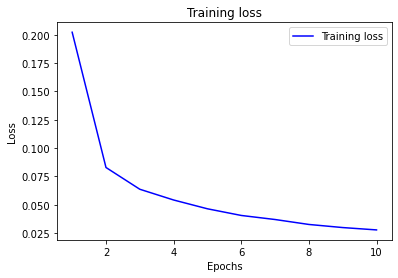

<Figure size 432x288 with 0 Axes>

In [ ]:
# Loss 그래프
plt.plot(epoch_range, loss, 'b', label='Training loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.figure()

<Figure size 432x288 with 0 Axes>

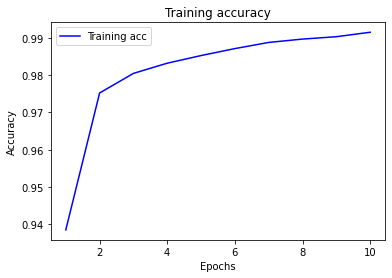

<Figure size 432x288 with 0 Axes>

In [ ]:
# Accuracy 그래프
plt.plot(epoch_range, acc, 'b', label='Training acc')
plt.title('Training accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.figure()